In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = open('three_kind_andMark/G_ex/first_non_excludeG.csv', encoding = 'utf-8')
df = pd.read_csv(data, skiprows = 0)
print('data size:', df.shape)
df.head()

data size: (7212, 6)


,ID,X,T-01,T-04,T-05,T-06
0,2015-10001,1,16.9,NaN,NaN,NaN
1,2015-10002,2,1800.0,NaN,35.6,2.0
2,2015-10003,0,6.8,61.0,0.0,1.0
3,2015-10004,1,961.4,786.0,1.5,1.0
4,2015-10005,2,169.8,169.0,23.2,2.0


ID：病例编号
X：分类目标
其余特征表示一线标志物

# 数据的直观分布

## 数据构成比例

### 时间与患病数

In [4]:
df['Year'] = df['ID']. apply(lambda row : row.split('-')[0] )
a = df[['Year', 'X', 'ID']].groupby(['Year', 'X']).count()
a

ID
Year X      
2015 0   965
     1   507
     2   543
2016 0  1441
     1   615
     2   591
2017 0  1441
     1   643
     2   466

In [5]:
plt.style.use('seaborn')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014FCACE9748>,
      dtype=object)

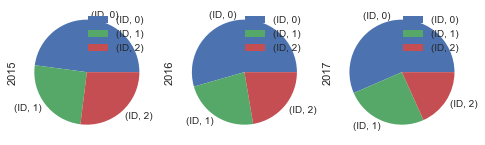

In [6]:
b = a.unstack()
b
(b.T).plot(kind = 'pie', subplots = True)

## 特征的分布规律

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114082550>,
      dtype=object)

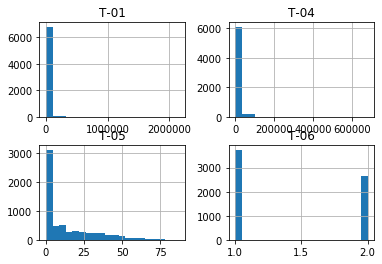

In [3]:
#复制除编号以及病状的所有特征
features = [x for x in df.columns if x not in['ID', 'X'] ]
plt.figure()
ax = plt.subplot(111)
df.hist(column = features, bins = 20, ax = ax)

正相关的特征分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014FCDB7F630>,
      dtype=object)

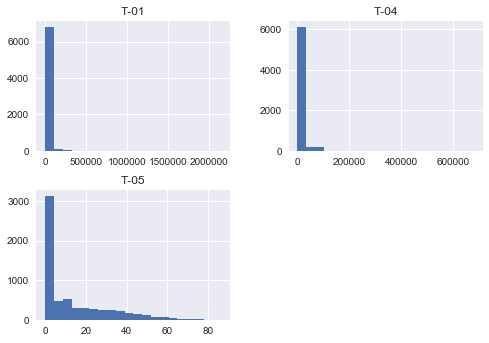

In [8]:
df.hist(column = ['T-01','T-04','T-05'], bins = 20)

负相关的特征分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014FCDDAE518>]],
      dtype=object)

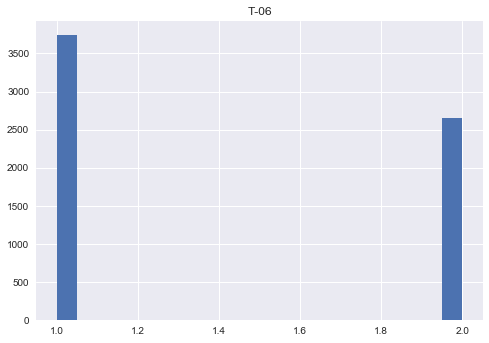

In [9]:
df.hist(column = ['T-06'], bins = 20)

## 数据的正态化变换



T-01和T-04两个特征的分布图不符合正态性

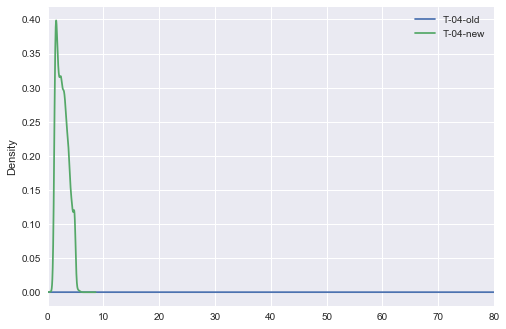

In [12]:
df['T-04'].plot(kind = 'kde', xlim = [0,80], label = 'T-04-old')

np.log10(df['T-04']).plot(kind = 'kde', xlim = [0,80], label = 'T-04-new')
plt.legend()

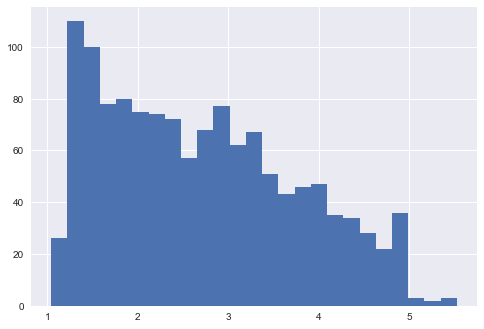

In [44]:
np.log10(df['T-04']).hist(bins = 25)

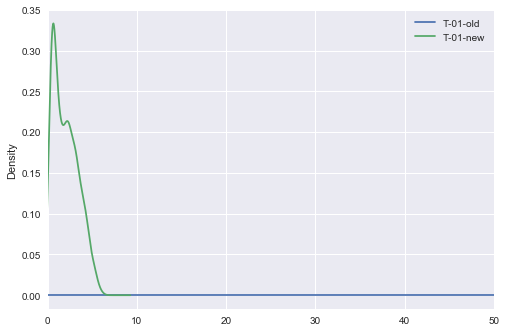

In [46]:
df['T-01'].plot(kind = 'kde', xlim = [0,50], label = 'T-01-old')

np.log10(df['T-01']).plot(kind = 'kde', xlim = [0,50], label = 'T-01-new')
plt.legend()

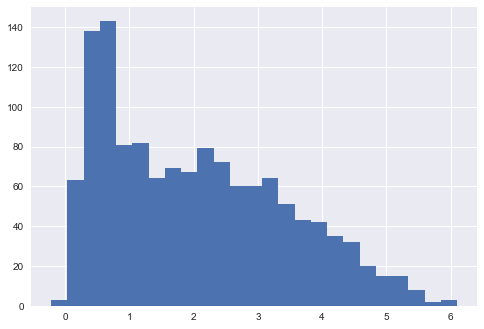

In [47]:
np.log10(df['T-01']).hist(bins = 25)

# 数据的浓缩

五数概括法：  
最小值、最大值、中位数、上四分位数、下四分位数

In [4]:
print('数据的概况总览')
df.describe()

数据的概况总览


,X,T-01,T-04,T-05,T-06
count,7212.000000,6.976000e+03,6515.000000,6399.000000,6399.000000
mean,0.688436,1.206151e+04,6835.649578,13.340439,1.415221
std,0.811350,7.543923e+04,22806.325287,17.337684,0.492799
min,0.000000,0.000000e+00,2.000000,0.000000,1.000000
25%,0.000000,5.400000e+00,62.000000,0.000000,1.000000
50%,0.000000,5.195000e+01,369.000000,4.900000,1.000000
75%,1.000000,9.508000e+02,2824.500000,23.100000,2.000000
max,2.000000,2.148000e+06,681310.000000,86.700000,2.000000


## 样本的矩


1阶原点矩——数学期望、均值  
2阶中心矩——方差  
3阶中心矩——偏度系数  
4阶中心矩——峰度系数

In [14]:
df['T-05'].describe()

count    6399.000000
mean       13.340439
std        17.337684
min         0.000000
25%         0.000000
50%         4.900000
75%        23.100000
max        86.700000
Name: T-05, dtype: float64

In [15]:
print('以特征T-05为例：')
print('均值 = ', df['T-05'].mean())
print('方差 = ', df['T-05'].var())
print('偏度 = ', df['T-05'].skew())
print('峰度 = ', df['T-05'].kurt())

以特征T-05为例：
均值 =  13.340439131114216
方差 =  300.595287787754
偏度 =  1.3131114516442894
峰度 =  0.8969107611871814


## 箱型图和异常值

In [5]:
import seaborn as sns

使用seaborn的箱线图展示

同样以T-05为例，看各分类的箱型图：


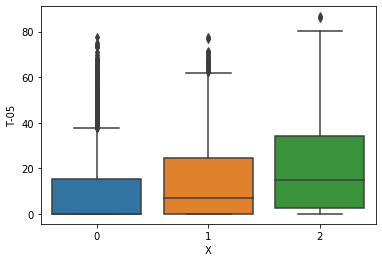

In [6]:
sns.boxplot(x = 'X', y = 'T-05', data = df)
print('同样以T-05为例，看各分类的箱型图：')

异常值分析：  
1) 大于Q3+1.5*IQR或小于Q1-1.5IQR的值，其中IQR为四分位距  
2) 3西格玛原则，数值分布在（μ—3σ,μ+3σ)中的概率为0.9974 

## 数据相关性

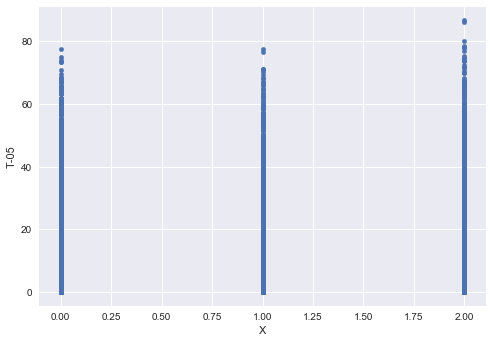

In [18]:
df[['X', 'T-05']].plot(x = 'X', y = 'T-05', kind = 'scatter')

患病和特征T-05不具有相关性

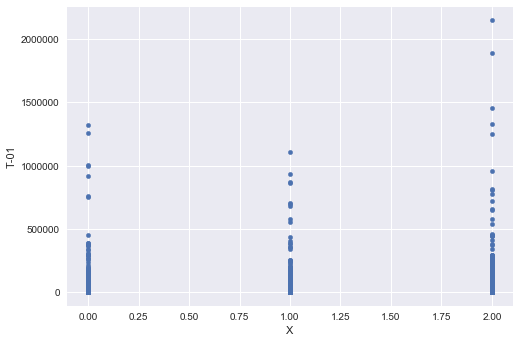

In [19]:
df[['X','T-01']].plot(x = 'X', y = 'T-01', kind = 'scatter')

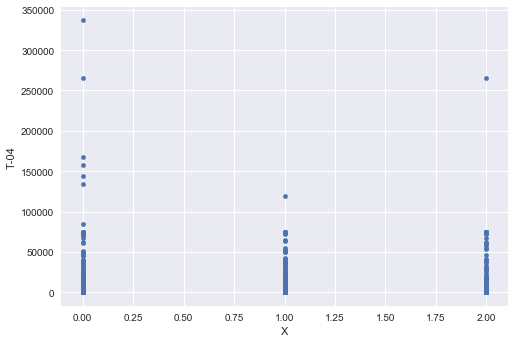

In [56]:
df[['X','T-04']].plot(x = 'X', y = 'T-04', kind = 'scatter')

T-01和T-05线性无关


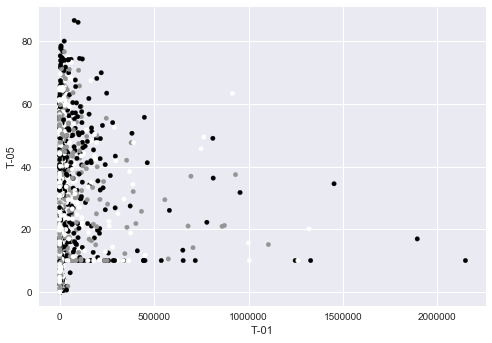

In [21]:
df[['T-01', 'T-05']].plot(x='T-01', y='T-05', c=df['X'], kind='scatter')
print('T-01和T-05线性无关')

T-01、T-04、T-05、T-06两两之间线性无关

## 相关系数矩阵

In [75]:
#def process(x):
#    if 0<= x <= 30:
#        return 0
#    elif 30< x < 60:
#        return 1
#    else:
#        return 2
#df['T-05-new'] = df['T-05'].apply(lambda x : process(x))
#df['T-05-new']

皮尔逊相关系数：
    值域为[-1,1], 1表示完全正相关， -1表示完全负相关，0表示无关， 绝对值越大表明相关性越强

In [7]:
df.corr(method = 'spearman')

,X,T-01,T-04,T-05,T-06
X,1.000000,0.280023,0.254789,0.267881,0.235112
T-01,0.280023,1.000000,0.318275,0.779164,0.640743
T-04,0.254789,0.318275,1.000000,0.263777,0.259083
T-05,0.267881,0.779164,0.263777,1.000000,0.884983
T-06,0.235112,0.640743,0.259083,0.884983,1.000000


In [8]:
corr_mat = df.corr(method = 'pearson')
corr_mat['X'].abs().sort_values(ascending = False) #得到性别与其他特征的相关系数  倒序

X       1.000000
T-05    0.240277
T-06    0.238664
T-04    0.103796
T-01    0.098845
Name: X, dtype: float64

# 预处理和降维

## 异常值的处理

### 缺失值处理

In [76]:
print("观察缺失值的比例，以决定采用填补还是丢弃")
df.isnull().describe()

观察缺失值的比例，以决定采用填补还是丢弃


,ID,X,T-01,T-04,T-05,T-06
count,7212,7212,7212,7212,7212,7212
unique,1,1,2,2,2,2
top,False,False,False,False,False,False
freq,7212,7212,6976,6515,6399,6399


这里直接删除包含缺失的样本  
实际应用中可能需要适合的fill none算法  

In [32]:
df.dropna(inplace = True) #数据清洗
print('剩余样本：', df.shape)

剩余样本： (6003, 6)


## 离群点处理

这里直接用3西格玛原则删除了异常的年龄  
实际应用中需要适合的outlier detect算法

3西格玛原则：|采样点与均值的差| > 3倍标准差 --》 则剔除
变形为：
     Xi< X - 3σ or  Xi > X + 3σ

In [33]:
#df.drop(columns = ['Year'])
cols = df.columns
for i in range(2,df.shape[1]):
    up_bound = df[cols[i]].mean() + 3*df[cols[i]].std()
    low_bound = df[cols[i]].mean() - 3*df[cols[i]].std()
    df = df[(df[cols[i]]<=up_bound) & (df[cols[i]]>=low_bound)]
    print("处理特征%s, 剩余样本：%d" % (cols[i],df.shape[0]))

处理特征T-01, 剩余样本：5937
处理特征T-04, 剩余样本：5911
处理特征T-05, 剩余样本：5849
处理特征T-06, 剩余样本：5849


## 数据降维

### 主成分分析

#### to maximize Var(c1X1 + c2X2 + c3X3 + ...) 其中 c1^2 + c2^2 +....+ cp^2 = 1

PCA算法流程：  
1) 0均值化：将X的每一维数据分别减去其平均值，即 X=X-Mean（X）  
2) 协方差矩阵：协方差矩阵C可以描述m维属性之间的相关关系，即 C=(X'X)/m  
3) 数据降维：协方差矩阵C是m*m阶，选取的特征向量矩阵P是m*k阶。通过 Y=XP 即得到投影后的k维样本。

In [11]:
from sklearn.decomposition import PCA
# 直接调包实现了，手写也不复杂
features = [i for i in df.columns if i not in ['ID', 'X', 'Year']]  #feature中去除了 'ID', 'X', 'Year'
X, y = df[features], df['X']
#PCA算法所要保留下来的主成分个数
pca = PCA(n_components=4)
pca.fit(X)
#降维后 各主成分的方差值 
print(pca.explained_variance_ratio_)
#返回各主成分的方差百分比(贡献率)
print(pca.explained_variance_)

[9.22344600e-01 7.76553565e-02 4.36240279e-08 1.20546254e-11]
[5.51278352e+09 4.64140160e+08 2.60737497e+02 7.20495794e-02]


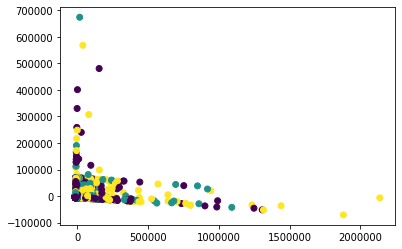

In [12]:
# n_component PCA算法中要保留的成分个数
pca = PCA(n_components=2)
#训练模型  用数据X来训练
pca.fit(X)
#返回降维后的数据
X_new = pca.transform(X)
#画出散点图
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, marker='o')  # y = 0 /1 /2
plt.show()

# 参数检测和方差分析

In [36]:
from scipy.stats.mstats import kruskalwallis
import scipy.stats as stats
import numpy as np
import scipy as sp

#啥叫显著性差异
# p>0.05 表示差异不显著
# 0.01 < p < 0.05 表示差异性显著
# p< 0.01 表示差异性极显著

#三组非正太分布数据检验
def Kruskawallis_test(list1, list2, list3):
    # Perform the Kruskal-Wallis test,返回True表示有显著差异，返回False表示无显著差异
    print("Use kruskawallis test:")
     
    h, p = kruskalwallis(list1, list2, list3)
    print("H value:",h)
    print("p value:",p)
      
    # Print the results
    if p<0.05:
        print('There is a significant difference.')
        return True
    else:
        print('No significant difference.')
        return False

#两组非正态分布数据检验   有关于统计学的知识
def Mannwhitneyu(group1, group2):   
    #以下处理sp版本问题 
    if np.int(sp.__version__.split('.')[1]) > 16:
        u, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    else:
        u, p_value = stats.mannwhitneyu(group1, group2, use_continuity=True)
        p_value *= 2    # because the default was a one-sided p-value
    print(("Mann-Whitney test", p_value))
    if p_value<0.05:
        print("there is significant difference")
    else:
        print("there is no significant difference")

## 单因素方差分析

In [37]:
#检验T-06和患病是否有关
list_1 = df[df['T-06'] == 1]['X'].tolist()
list_2 = df[df['T-06'] == 2]['X'].tolist()

#独立T检验
print(stats.ttest_ind(list_1, list_2))

#Mannwhitneyu 检验
print(Mannwhitneyu(list_1, list_2))


Ttest_indResult(statistic=-18.420359083221758, pvalue=1.0618543899920568e-73)
('Mann-Whitney test', 7.678392565190129e-70)
there is significant difference
None


结果说明，T-06和患病与否有显著性相关

## 多因素方差分析

连续型的属性，需要采样后进行多因子的方差分析  
例如T-05，可以分成多段bins与其他因素结合 

In [18]:
def process(x):
    if 0<= x <=30:
        return 0
    elif 30< x< 60:
        return 1
    else:
        return 2

df['T-05-new'] = df['T-05'].apply(lambda x : process(x))
df['T-05-new'].head()

0    0
1    1
2    0
3    0
4    0
Name: T-05-new, dtype: int64

In [24]:
list_T05_0 = df[df['T-05-new']==0]['X'].tolist()
list_T05_1 = df[df['T-05-new']==1]['X'].tolist()
list_T05_2 = df[df['T-05-new']==2]['X'].tolist()
#Kruskawallis_test  三组非正太分布数据检验
Kruskawallis_test(list_T05_0, list_T05_1, list_T05_2)

Use kruskawallis test:
H value: 21.62376730593536
p value: 2.0158517524265452e-05
There is a significant difference.


True

结果说明，T-05和患病与否具有显著相关

# 完整的处理流程

## 数据分析

## 数据清洗

### 删除缺失> 15%的列

In [77]:
isnull_df = df.isnull().describe()
isnull_df

,ID,X,T-01,T-04,T-05,T-06
count,7212,7212,7212,7212,7212,7212
unique,1,1,2,2,2,2
top,False,False,False,False,False,False
freq,7212,7212,6976,6515,6399,6399


In [78]:
isnull_df.loc[:, isnull_df.loc['freq'] < isnull_df.loc['count']*0.85]

""
count
unique
top
freq


In [27]:
#删除缺失值比例大于0.85的列
#df.drop(columns = [ ''] ,inplace = True)
#df.head()

### 删除相关性<0.01的列

In [79]:
corr_mat = df.corr(method = 'pearson')
corr_mat['X'].abs().sort_values(ascending = False)

X       1.000000
T-06    0.210434
T-05    0.209215
T-04    0.096687
T-01    0.081757
Name: X, dtype: float64

In [41]:
corr = corr_mat['X'].abs()
print(corr[corr < 0.01].index)

Index([], dtype='object')


In [30]:
df.drop(columns = [] , inplace = True)
df.head()

,ID,X,T-01,T-04,T-05,T-06,T-05-new
0,15-10001,0,1.2,36.0,0.0,1.0,0
1,15-10002,0,19.1,79.0,32.9,2.0,1
2,15-10003,1,21.8,106.0,9.7,1.0,0
3,15-10004,0,177.7,699.0,7.1,1.0,0
4,15-10005,1,138.2,41437.0,8.5,1.0,0


## 数据预处理

### 删除6sigma离群点

In [62]:
print('原始样本', df.shape)
des_df = df.describe()
des_df

原始样本 (5960, 6)


,X,T-01,T-04,T-05,T-06
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.694128,8662.069832,6095.663591,13.228626,1.411242
std,0.811211,37031.136650,15726.951741,17.318739,0.492100
min,0.000000,0.000000,2.000000,0.000000,1.000000
25%,0.000000,5.400000,63.000000,0.000000,1.000000
50%,0.000000,55.000000,378.000000,4.600000,1.000000
75%,1.000000,972.650000,2784.500000,22.700000,2.000000
max,2.000000,463783.000000,134091.000000,86.700000,2.000000


离群点大于Q3+1.5*IQR或小于Q1-1.5IQR的值，其中IQR为四分位距 箱线图中上限和下限

In [32]:
des_df.loc['25%', 'T-05']

0.0

In [95]:
#删除离群点  改为正常值

#得到目前为止 经过清洗后的数据的特征名 除 ‘ID’ 'X':病情
features = [x for x in df.columns if x not in['ID', 'X']] 
#提取出除X外 与x相关系数大于0.1的索引
importances = [x for x in corr[corr>0.1].index.tolist() if x != 'X']
for x in features:
#     upper_bound = des_df.loc['75%', x] + 1.5*(des_df.loc['75%', x]-des_df.loc['25%', x])
#     lower_bound = des_df.loc['25%', x] - 1.5*(des_df.loc['75%', x]-des_df.loc['25%', x])
    upper_bound = des_df.loc['mean', x] + 6*des_df.loc['std', x]
    lower_bound = des_df.loc['mean', x] - 6*des_df.loc['std', x]
    if x in importances:
        df = df[(df[x]<=upper_bound) & (df[x]>=lower_bound)]
    else:
        df.loc[df[x]>upper_bound, x] = upper_bound
        df.loc[df[x]<lower_bound, x] = lower_bound
print("剩余样本：", df.shape)

剩余样本： (5905, 6)


### 分段mean 补全缺失值

In [13]:
df[['X', 'ID']].groupby('X').count()

,ID
X,
0,3847
1,1765
2,1600


In [14]:
# 分段 按x=0， 1， 2不同情况 把每列进行均值填充
print(df['X'].unique().tolist())
for x in df['X'].unique().tolist():
    #复制所有df['X'] = 当前遍历值 的行
    tmp = df[df['X']==x].copy(deep=False)
   #tmp.fillna(tmp.mean(axis=0, skipna=True), inplace=True)
    #print(tmp.mean())
    #以'X' 为分组， NAN均以每列的平均值填充 
    df.loc[df['X']==x] = df[df['X']==x].fillna(tmp.mean()) 
df.isnull().describe()

[1, 2, 0]


,ID,X,T-01,T-04,T-05,T-06
count,7212,7212,7212,7212,7212,7212
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,7212,7212,7212,7212,7212,7212


### 数据标准化

In [15]:
features = [x for x in df.columns if x not in['ID', 'X']]
for x in features:
    delta = 0.000001
    df[x] = (df[x] - df[x].mean()) / (df[x].std() + delta)
df.describe()

,X,T-01,T-04,T-05,T-06
count,7212.000000,7.212000e+03,7.212000e+03,7.212000e+03,7.212000e+03
mean,0.688436,2.512318e-17,-1.576357e-17,-1.970446e-17,3.862074e-16
std,0.811350,1.000000e+00,1.000000e+00,9.999999e-01,9.999979e-01
min,0.000000,-1.622955e-01,-3.144041e-01,-8.125434e-01,-8.899188e-01
25%,0.000000,-1.622200e-01,-3.111419e-01,-8.125434e-01,-8.899188e-01
50%,0.000000,-1.614552e-01,-2.880765e-01,-2.878749e-01,-8.899188e-01
75%,1.000000,-1.459895e-01,-9.496523e-02,4.311414e-01,1.256594e+00
max,2.000000,2.878412e+01,3.109928e+01,4.476847e+00,1.256594e+00


In [8]:
df.to_csv('first_non_excludeG_Cleaned.csv', index = False, header = True, encoding = 'utf-8')

计算协方差

In [16]:
cov_mat = df.cov()
cov_mat['X'].abs().sort_values(ascending = False)

X       0.658288
T-05    0.206206
T-06    0.204837
T-04    0.088422
T-01    0.081410
Name: X, dtype: float64

In [17]:
cov = cov_mat['X']
print('正向：', cov[cov > 0].index.tolist())
print('负向: ', cov[cov < 0].index.tolist())

正向： ['X', 'T-01', 'T-04', 'T-05', 'T-06']
负向:  []


## 数据建模

### 训练逻辑回归LR模型

In [8]:
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [9]:
#划分训练集与测试集  随机
target = 'X'
features = [x for x in df.columns if x not in['ID', 'X']]
X, Y = df[features], df[target]# X = dataSet  and Y =  labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
#构建并训练模型
##  multi_class:分类方式选择参数，有"ovr(默认)"和"multinomial"两个值可选择，在二元逻辑回归中无区别
##  cv:几折交叉验证
##  solver:优化算法选择参数，当penalty为"l1"时，参数只能是"liblinear(坐标轴下降法)"
##  "lbfgs"和"cg"都是关于目标函数的二阶泰勒展开
##  当penalty为"l2"时，参数可以是"lbfgs(拟牛顿法)","newton_cg(牛顿法变种)","seg(minibactch随机平均梯度下降)"
##  维度<10000时，选择"lbfgs"法，维度>10000时，选择"cs"法比较好，显卡计算的时候，lbfgs"和"cs"都比"seg"快
##  penalty:正则化选择参数，用于解决过拟合，可选"l1","l2"
##  tol:当目标函数下降到该值是就停止，叫：容忍度，防止计算的过多
lr = LogisticRegressionCV(
    multi_class="multinomial",
    fit_intercept=True,
    Cs=np.logspace(-2,2,20),
    cv=2,
    penalty="l2",
    solver="lbfgs",
    tol=0.01,
    max_iter = 1000,
    class_weight='balanced',
    
)
re = lr.fit(X_train,Y_train)


In [11]:
#模型效果获取
r = re.score(X_train,Y_train)
print("R值(准确率):",r)
print("参数:",re.coef_)
print("截距:",re.intercept_)
print("稀疏化特征比率:%.2f%%" %(np.mean(lr.coef_.ravel()==0)*100))
print("=========sigmoid函数转化的值，即：概率p=========")
print(re.predict_proba(X_test))     #sigmoid函数转化的值，即：概率p

R值(准确率): 0.5361414456578263
参数: [[-0.05469845 -0.14560043 -0.1796694  -0.14502354]
 [-0.01237573  0.0579082   0.01055159 -0.01365496]
 [ 0.06707417  0.08769223  0.16911781  0.1586785 ]]
截距: [ 0.01279717  0.04030205 -0.05309922]
稀疏化特征比率:0.00%
=========sigmoid函数转化的值，即：概率p=========
[[0.36277571 0.34550959 0.29171471]
 [0.16765855 0.31137189 0.52096957]
 [0.41929196 0.33664995 0.24405809]
 ...
 [0.17815965 0.32039977 0.50144058]
 [0.11756794 0.31266427 0.56976779]
 [0.43944352 0.33448254 0.22607394]]


### 预测结果评价

In [12]:
import matplotlib as mpl

#解决中文显示问题
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


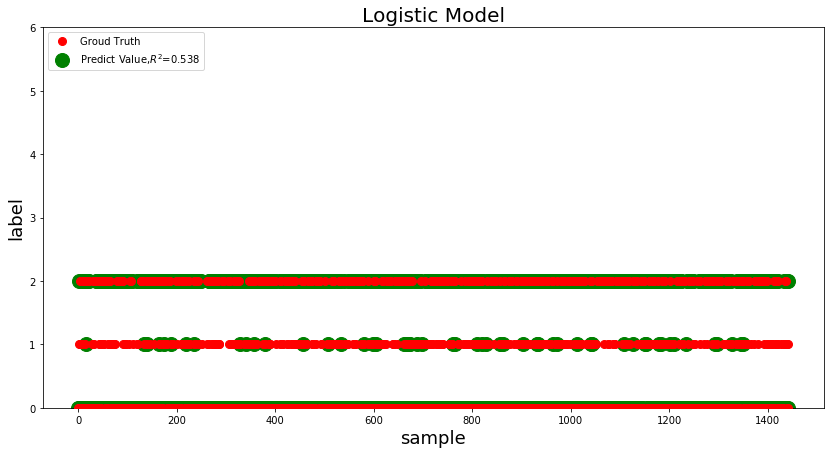

=============Y_test==============
[0 1 0 ... 1 1 0]
============Y_predict============
[0 2 0 ... 2 2 0]


In [13]:
#预测
Y_predict = lr.predict(X_test)
 
#画图对预测值和实际值进行比较
x = range(len(X_test))
plt.figure(figsize=(14,7),facecolor="w")
plt.ylim(0,6)
plt.plot(x,Y_test,"ro",markersize=8,zorder=3,label=u"Groud Truth")
plt.plot(x,Y_predict,"go",markersize=14,zorder=2,label=u"Predict Value,$R^2$=%.3f" %lr.score(X_test,Y_test))
plt.legend(loc="upper left")
plt.xlabel(u"sample",fontsize=18)
plt.ylabel(u"label",fontsize=18)
plt.title(u"Logistic Model",fontsize=20)
plt.show()
 
print("=============Y_test==============")
print(Y_test.ravel())
print("============Y_predict============")
print(Y_predict)

In [14]:
from sklearn import metrics

print("预测准确率：", metrics.accuracy_score(Y_test, Y_predict))
print("精度：", metrics.precision_score(Y_test, Y_predict, average="weighted"))
print("召回率：", metrics.recall_score(Y_test, Y_predict, average="weighted"))

预测准确率： 0.5384615384615384
精度： 0.5706080380559366
召回率： 0.5384615384615384


In [11]:
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn import tree
from matplotlib import pyplot as plt

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.svm import SVC


#划分训练集与测试集  随机
target = 'X'
features = [x for x in df.columns if x not in['ID', 'X']]
X, Y = df[features], df[target]# X = dataSet  and Y =  labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## 决策树

### 分支方式不同 、maxdepth不同

In [12]:
def DT(X_train, X_test, Y_train, Y_test):
    maxdepth = 40
    depths = np.arange(2, maxdepth)
    criterions = ['gini','entropy']

    best_testing_score = -1
    best_testing_depth = 0
    best_criterions = ''

    for criterion in criterions:
        training_scores = []
        testing_scores = []
        for depth in depths:
            clf = tree.DecisionTreeClassifier(criterion = criterion ,max_depth = depth)
            clf.fit(X_train, Y_train)
            tra_s = clf.score(X_train, Y_train)
            tes_s = clf.score(X_test, Y_test)
            training_scores.append(tra_s)
            testing_scores.append(tes_s)
            if best_testing_score < tes_s:
                best_testing_score = tes_s
                best_testing_depth = depth
                best_criterions = criterion
    print(best_testing_score)
    print(best_testing_depth)
    print(best_criterions)
    
    
DT(X_train, X_test, Y_train, Y_test)


#print('此时DT的高度：%d,决策方法为：%s'% (best_testing_depth, best_criterions))

#绘图
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#ax.plot(depths, training_scores, label = 'Traing score', marker = 'o')
#ax.plot(depths, testing_scores, label = 'Testing score', marker = '*')
#ax.set_xlabel('maxdepth')
#ax.set_ylabel('score')
#ax.set_title('Decision Tree Classification - %s' % criterion)
#ax.legend(framealpha = 0.5, loc = 'best')
#plt.show()

0.6174636174636174
5
gini


## SVM

In [28]:
svm_clf = Pipeline((
                    ('scaler', StandardScaler()),
                   ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
                  )).fit(X_train, Y_train)
print('linear_svc training score:%f' % svm_clf.score(X_train, Y_train))
print('linear_svc testing score:%f' % svm_clf.score(X_test, Y_test))

linear_svc training score:0.506327
linear_svc testing score:0.496881


In [30]:
#poly_kernel_svm_clf = Pipeline((('scaler', StandardScaler()),
#                               ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5))
#                               )).fit(X_train, Y_train)
#print('poly_kernel_svc training score:%f' % poly_kernel_svm_clf.score(X_train, Y_train))
#print('poly_kernel_svc testing score:%f' % poly_kernel_svm_clf.score(X_test, Y_test))

In [13]:
rbf_kernel_svm_clf = Pipeline((('scaler', StandardScaler()),
                               ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 5 )) #当C为0.001 时 预测非1
                               )).fit(X_train, Y_train)
#print('rbf_kernel_svc training score:%f' % rbf_kernel_svm_clf.score(X_train, Y_train))
print('rbf_kernel_svc testing score:%f' % rbf_kernel_svm_clf.score(X_test, Y_test))

rbf_kernel_svc testing score:0.595288


## CCA特征

In [36]:
CCA_FILES = ["CCA.csv", "LDCCA.csv", "LPCCA.csv", "rank-CCA.csv", "semi-CCA.csv"]#, "DMPCCA.csv"
PATH = '/Users/xiangsong/Desktop/数据分析/cleaned_data/CCA/CCA_cleaned/first_non/'
for fi in CCA_FILES:
    
    df = pd.read_csv(open(PATH+fi, encoding='utf-8'), skiprows=0)  
    #划分训练集与测试集
    target = 't'
    features = [x for x in df.columns if x not in['t']]
    X, Y = df[features], df[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    rbf_kernel_svm_clf = Pipeline((('scaler', StandardScaler()),
                               ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 5 )) #当C为0.001 时 预测非1
                               )).fit(X_train, Y_train)
    print("===== %s =====" % fi)
    print('rbf_kernel_svc training score:%f' % rbf_kernel_svm_clf.score(X_train, Y_train))
    print('rbf_kernel_svc testing score:%f' % rbf_kernel_svm_clf.score(X_test, Y_test))
    print("==========")
    

===== CCA.csv =====
rbf_kernel_svc training score:0.571798
rbf_kernel_svc testing score:0.538793
===== LDCCA.csv =====
rbf_kernel_svc training score:0.571798
rbf_kernel_svc testing score:0.538793
===== LPCCA.csv =====
rbf_kernel_svc training score:0.579991
rbf_kernel_svc testing score:0.529310
===== rank-CCA.csv =====
rbf_kernel_svc training score:0.572014
rbf_kernel_svc testing score:0.537931
===== semi-CCA.csv =====
rbf_kernel_svc training score:0.572014
rbf_kernel_svc testing score:0.538793


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas  as pd
import numpy as np
CCA_FILES = ["CCA.csv", "LDCCA.csv", "LPCCA.csv", "rank-CCA.csv", "semi-CCA.csv"]#, "DMPCCA.csv"
PATH = '/Users/xiangsong/Desktop/数据分析/cleaned_data/CCA/CCA_cleaned/first_non/'
for fi in CCA_FILES:
    
    df = pd.read_csv(open(PATH+fi, encoding='utf-8'), skiprows=0)  
    #划分训练集与测试集
    target = 't'
    features = [x for x in df.columns if x not in['t']]
    X, Y = df[features], df[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    print("===== %s =====" % fi)
    DT(X_train, X_test, Y_train, Y_test)
    print("==========")

===== CCA.csv =====
0.5448275862068965
4
gini
===== LDCCA.csv =====
0.5448275862068965
4
gini
===== LPCCA.csv =====
0.5491379310344827
3
gini
===== rank-CCA.csv =====
0.5448275862068965
4
gini
===== semi-CCA.csv =====
0.5448275862068965
4
gini
